# Projeto de Filtros - Emanuel SA

## Caracterísitcas dos Filtros

Serão feitos filtros para duas frequências, um passa baixa para filtrar áudio de alta frequência (acima da vocalização humana) e um passa alta para bloquear interferência de baixa frequência em um amplificador AC de ~2 kHz. Um filtro FIR e outro IIR serão feitos para cada frequência. Assim, temos a seguinte tabela de valores para os filtros:

|IR |Tipo|$f_c$ (kHz)|$\omega_c$ (k rad/s)|
|---|----|-----------|--------------------|
|FIR|PB  |2          |$4\pi$              |
|IIR|PB  |2          |$4\pi$              |
|FIR|PA  |2          |$4\pi$              |
|IIR|PA  |2          |$4\pi$              |

Analisando as características dos sinais e seus contextos, podemos também decidir a ordem do filtro. Ambos os filtros podem ter uma ordem relativamente pequena (~3 ou 4) devido à grande separação entre a frequência do sinal e a do ruído que queremos isolar.

Também temos que o filtro PB deve ter um atraso de grupo mais consistente entre as frequências, já que um espalhamento do sinal pode tornar a fala incompreensível ou irritante.

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sp

import numpy as np

import DSP

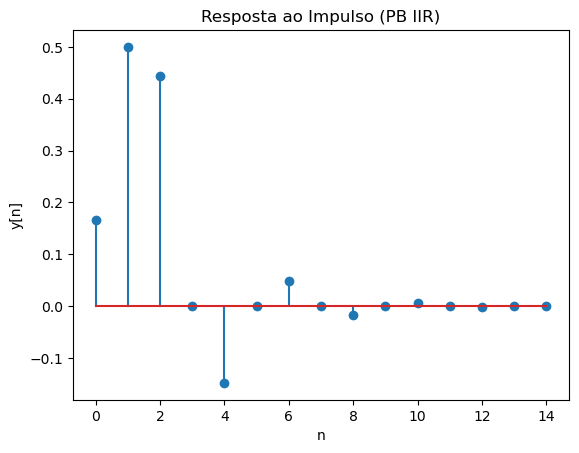

<Figure size 640x480 with 0 Axes>

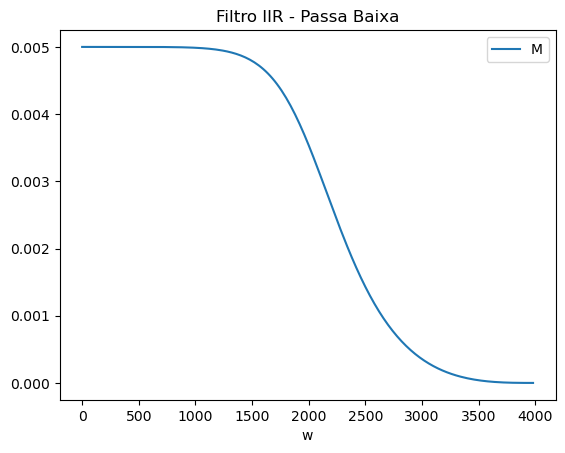

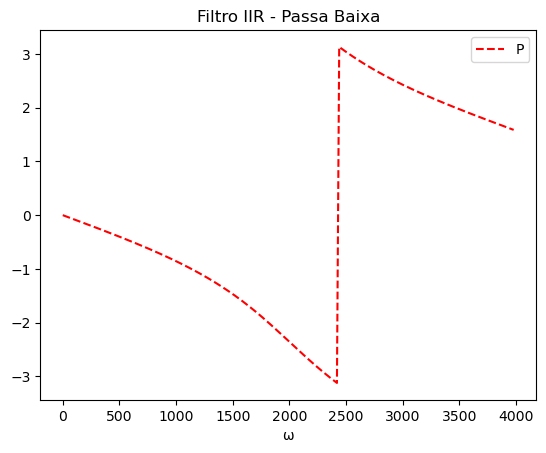

In [2]:
# Projeto do filtro PB IIR
fc = 2e3   # Analógica
fs = 8e3   # Sampling
[b_PBI, a_PBI] =sp.butter(3, fc, fs=fs)
# Resposta ao impulso
#[t, h_PBF] = sp.impulse((b, a))
x = np.zeros(400)
x[0] = 1
h_PBI = sp.lfilter(b_PBI, a_PBI, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI[0:nf], np.arange(0, nf)], title="Resposta ao Impulso (PB IIR)")
DSP.plot_FFT(h_PBI, type= "Separate", T=1/fs, title="Filtro IIR - Passa Baixa")


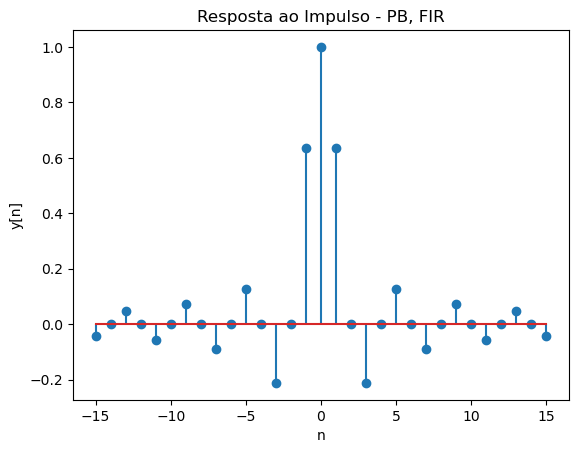

<Figure size 640x480 with 0 Axes>

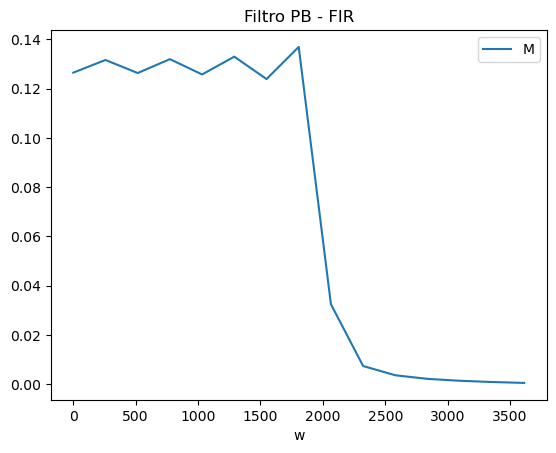

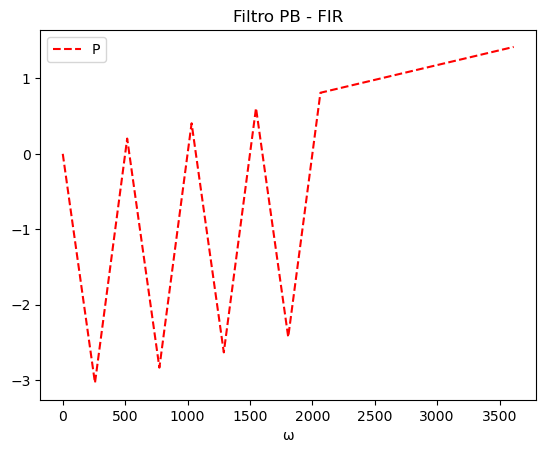

In [3]:
# Projeto do filtro PB - FIR
wc    = 2*fc/fs # Frequência Digital /pi
n0    = 15
n     = np.arange(-n0, n0+1)
h_PBF = np.sinc(wc*n) # Multiplica frequêcia por pi
DSP.plot([h_PBF, n], "Resposta ao Impulso - PB, FIR")
DSP.plot_FFT(h_PBF, type= "Separate", T=1/fs, title="Filtro PB - FIR")

Para pegar os coeficientes b do filtro, podemos simplesmente fazer $b[n] = h[n]$ e a = [1]

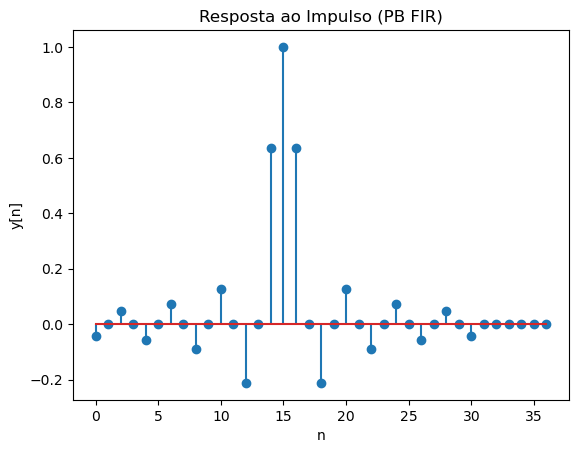

In [4]:
# Aplicando filtro
a_PBF = np.array([1])
b_PBF = h_PBF # Filtro de ordem 30
# Resposta ao ipulso do filtro
x = np.zeros(37)
x[0] = 1
h_PBI = sp.lfilter(b_PBF, a_PBF, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI, np.arange(0, 37)], title="Resposta ao Impulso (PB FIR)")

c:\Users\emanuel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


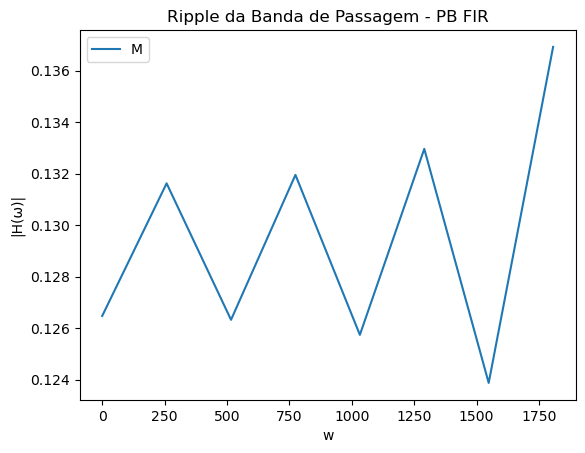

In [5]:
# Ripple de frequência
F_PBF = np.array(DSP.get_FFT(h_PBF, 1/fs))
Η     = F_PBF[0][(F_PBF[1] < fc)]
Φ     = F_PBF[1][(F_PBF[1] < fc)]
F_BP  = [Η, Φ] # Banda de Passagem
DSP.Plot_Fourier(F_BP, title="Ripple da Banda de Passagem - PB FIR")

In [6]:
ripple = np.max(np.abs(Η)) - np.min(np.abs(Η))
print("Ripple de Banda de Passagem: ", round(ripple, 4),
       " (", round(100*ripple/np.max(np.abs(Η)), 4), "% )")

Ripple de Banda de Passagem:  0.0131  ( 9.5317 % )


O ripple observado não deve ser alto o suficiente para causar problemas, portanto o filtro é aceitável

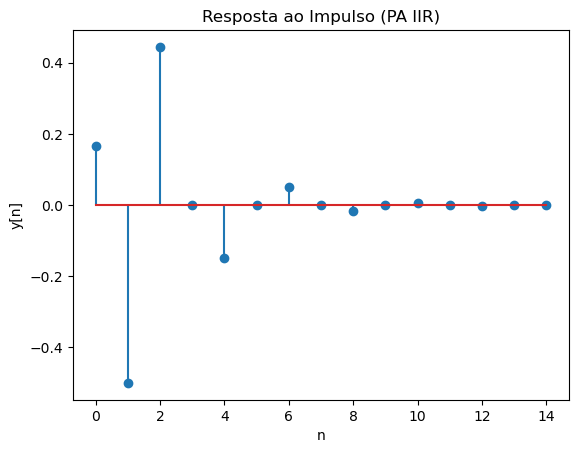

<Figure size 640x480 with 0 Axes>

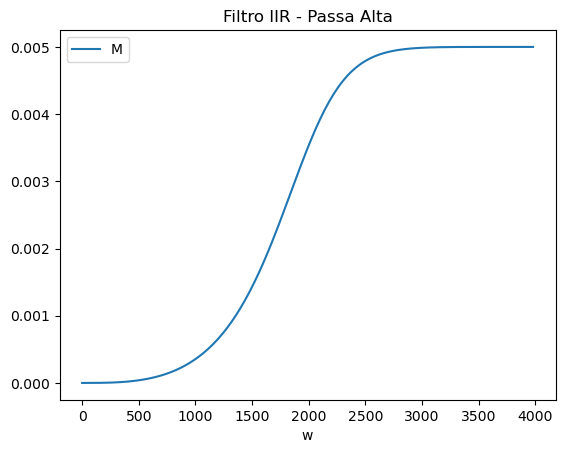

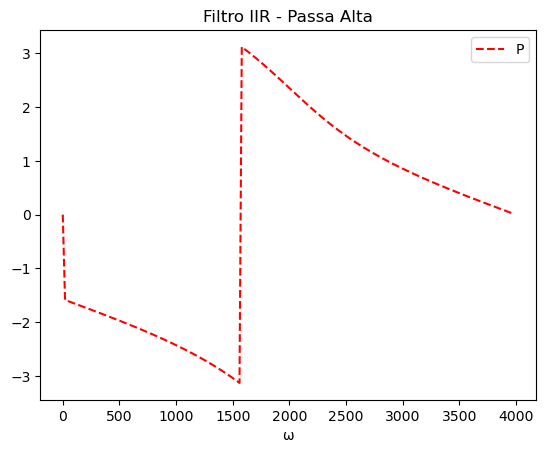

In [7]:
# Filtro Passa Alta - IIR
[b_PAI, a_PAI] = sp.butter(3, fc, "hp", fs=fs)
x = np.zeros(400)
x[0] = 1
h_PAI = sp.lfilter(b_PAI, a_PAI, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PAI[0:nf], np.arange(0, nf)], title="Resposta ao Impulso (PA IIR)")
DSP.plot_FFT(h_PAI, type= "Separate", T=1/fs, title="Filtro IIR - Passa Alta")

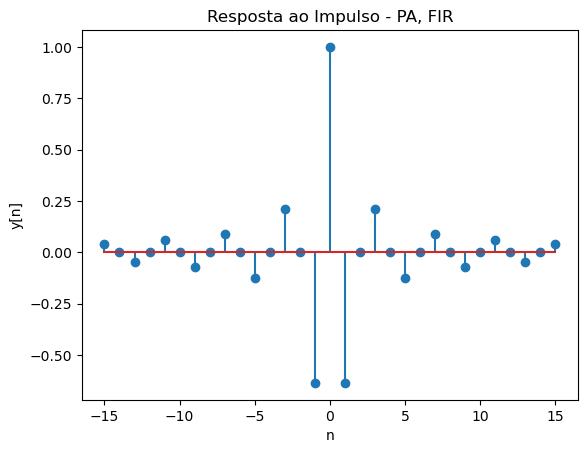

<Figure size 640x480 with 0 Axes>

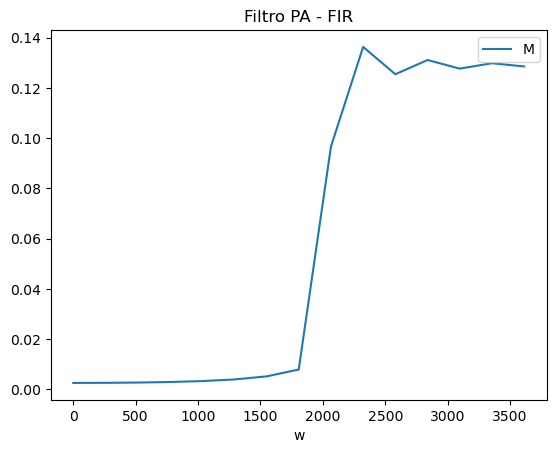

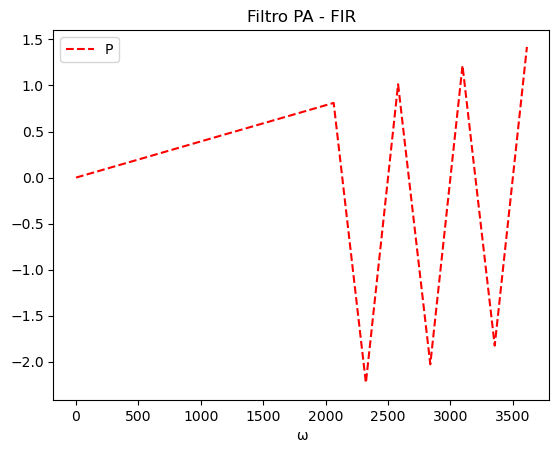

In [8]:
# Projeto do filtro PA - FIR
wc    = 2*fc/fs # Frequência Digital /pi
n0    = 15
n     = np.arange(-n0, n0+1)
h_PAF = ((-1.0)**n)*np.sinc(wc*n)
DSP.plot([h_PAF, n], "Resposta ao Impulso - PA, FIR")
DSP.plot_FFT(h_PAF, type= "Separate", T=1/fs, title="Filtro PA - FIR")

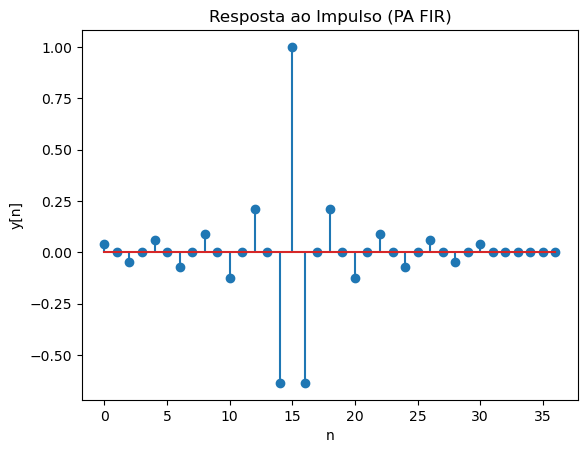

In [9]:
# Aplicando filtro
a_PAF = np.array([1])
b_PAF = h_PAF # Filtro de ordem 30
# Resposta ao impulso do filtro
x = np.zeros(37)
x[0] = 1
h_PBI = sp.lfilter(b_PAF, a_PAF, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI, np.arange(0, 37)], title="Resposta ao Impulso (PA FIR)")

Podemos ver que os filtros FIR possuem fase linearmente dependente à frequência, conforme desejado na fase inicial do projeto, enquanto os filtros IIR possuem fase não linear e, portanto, atraso de grupo não constante.

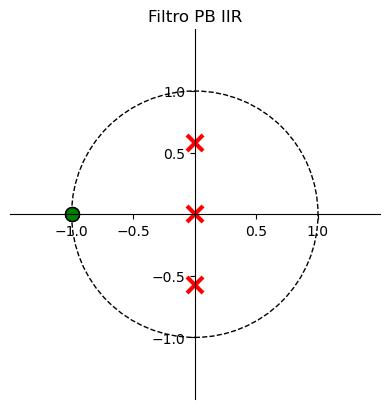

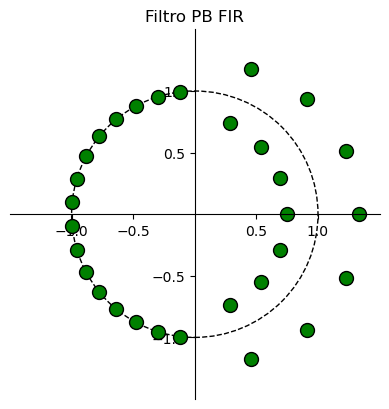

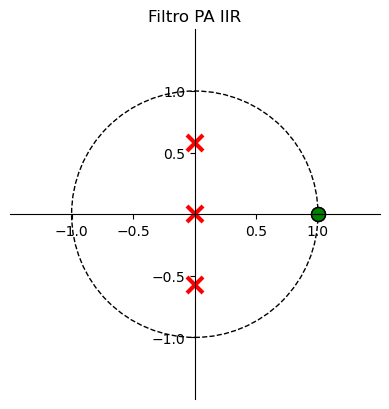

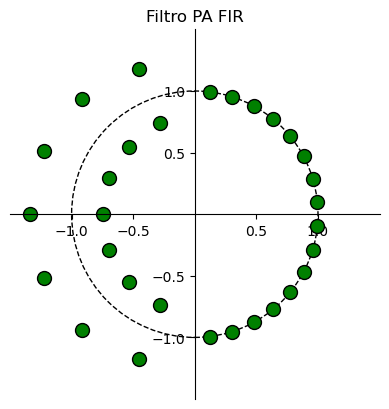

------------------------------------------------
Filtro PB - IIR
       0.167 + 0.5z^-1 + 0.5z^-2 + 0.167z^-3
H(z) = -------------------------------------
       1.0 + 0.333z^-2
------------------------------------------------
Filtro PB - FIR
       -0.042 + 0.049z^-2 + -0.058z^-4 + 0.071z^-6 + -0.091z^-8 + 0.127z^-10 + -0.212z^-12 + 0.637z^-14 + 1.0z^-15 + 0.637z^-16 + -0.212z^-18 + 0.127z^-20 + -0.091z^-22 + 0.071z^-24 + -0.058z^-26 + 0.049z^-28 + -0.042z^-30
H(z) = -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1
------------------------------------------------
Filtro PA - FIR
       0.042 + -0.049z^-2 + 0.058z^-4 + -0.071z^-6 + 0.091z^-8 + -0.127z^-10 + 0.212z^-12 + -0.637z^-14 + 1.0z^-15 + -0.637z^-16 + 0.212z^-18 + -0.127z^-20 + 0.091z^-22 + -0.071z^-24 + 0.058z^-26 + -0.049z^-28 + 0.042z^-30
H(z) = -------

In [10]:
## Limpa coeficientes
a_PBI[np.abs(a_PBI) < 1e-6] = 0
b_PBI[np.abs(b_PBI) < 1e-6] = 0
a_PBF[np.abs(a_PBF) < 1e-6] = 0
b_PBF[np.abs(b_PBF) < 1e-6] = 0
a_PAI[np.abs(a_PAI) < 1e-6] = 0
b_PAI[np.abs(b_PAI) < 1e-6] = 0
a_PAF[np.abs(a_PAF) < 1e-6] = 0
b_PAF[np.abs(b_PAF) < 1e-6] = 0
## Diagramas de polos e zeros
DSP.zplane(b_PBI, a_PBI, title="Filtro PB IIR")
DSP.zplane(b_PBF, a_PBF, title="Filtro PB FIR")
DSP.zplane(b_PAI, a_PAI, title="Filtro PA IIR")
DSP.zplane(b_PAF, a_PAF, title="Filtro PA FIR")
## Equações de Transferência
print("------------------------------------------------")
print("Filtro PB - IIR")
DSP.print_Hz(b_PBI, a_PBI)
print("------------------------------------------------")
print("Filtro PB - FIR")
DSP.print_Hz(b_PBF, a_PBF)
###
print("------------------------------------------------")
print("Filtro PA - FIR")
DSP.print_Hz(b_PAF, a_PAF)
print("------------------------------------------------")
print("Filtro PA - IIR")
DSP.print_Hz(b_PAI, a_PAI)
print("------------------------------------------------")

## Observações

Como a frequência de corte se encontra no meio da frequência de Nyquist, podemos ver que para os filtros FIR todos os zeros se encontram em uma metade do círculo unitário e que pela fase linear, todos os zeros seguem o padrão $z=1$, $z=a$, $z=1/a$, $z=z^*$ e $z=1/z^*$

Para os filtros IIR, podemos observar o comportamento comum de filtros butterworth, em que todos os polos se encontram em um círculo menor que o raio unitário, separados de $\dfrac{180º}{ordem}=\dfrac{180º}{3}=60º$, sendo que o polo em (0, $1/\sqrt{3}$) e o polo em (0, $-1/\sqrt{3}$) estão separados por $ordem\cdot 60º=180º$

Os polos em zero dos filtros butterworth parecem estranhos a primeira vista, dado que há um termo independente no polinômio característico da função de transferência, mas isso se deve à escrita usual do polinômio: $H(z)=\dfrac{num}{z^3+0.333z^1}$, onde há de fato um polo em z=0. Seguindo a mesma ideia, temos que os filtros FIR possuem n polos na origiem, uma vez que possuem a equação $\dfrac{num}{z^{30}}$

c:\Users\emanuel\Documents\Projects\Misc\DSP\DSP.py:584: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w, gd = sp.signal.group_delay((b, a), fs=fs)


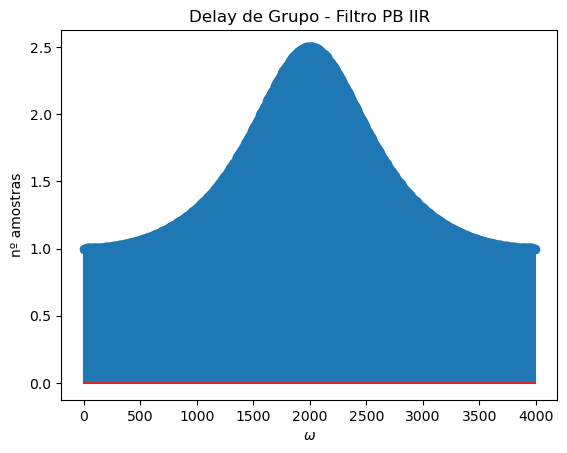

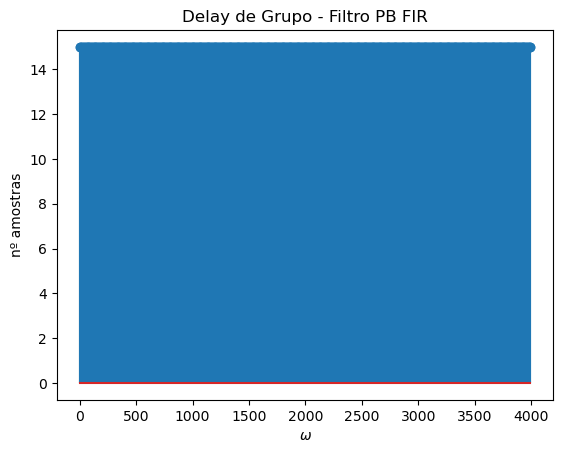

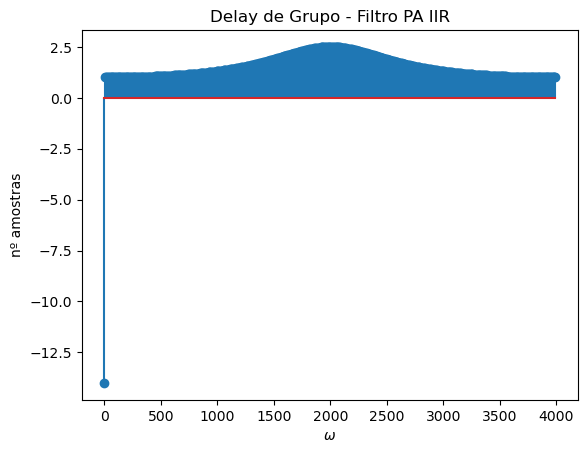

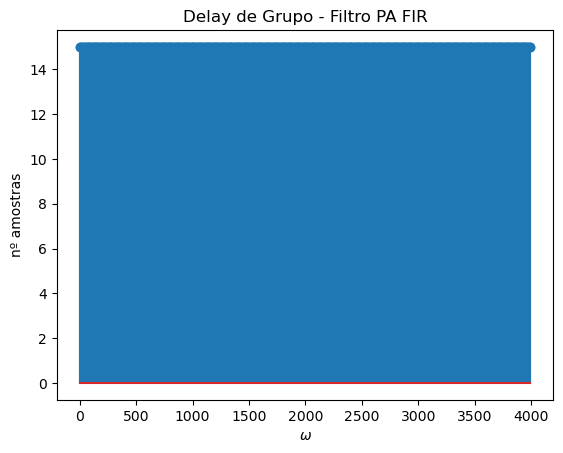

In [11]:
## Atraso de grupo dos filtros
DSP.plot_group_delay(b_PBI, a_PBI, fs=fs, title="Delay de Grupo - Filtro PB IIR")
DSP.plot_group_delay(b_PBF, a_PBF, fs=fs, title="Delay de Grupo - Filtro PB FIR")
DSP.plot_group_delay(b_PAI, a_PAI, fs=fs, title="Delay de Grupo - Filtro PA IIR")
DSP.plot_group_delay(b_PAF, a_PAF, fs=fs, title="Delay de Grupo - Filtro PA FIR")

O delay de grupo para o filtro passa alta IIR parece ter um erro, em que $\omega=0$ produz um avanço de ~14.5 amostras no sinal, este efeito não é observado na resposta do filtro, mas como está fora de sua banda de passagem, não deve impactar o resultado

In [15]:
## Coeficientes Quantizados
[[Q8b_PBI, L, B], [Q8a_PBI, L, B]] = [DSP.QCoeff(b_PBI, 8), DSP.QCoeff(a_PBI, 8)]
[[Q8b_PBF, L, B], [Q8a_PBF, L, B]] = [DSP.QCoeff(b_PBF, 8), DSP.QCoeff(a_PBF, 8)]
[[Q8b_PAI, L, B], [Q8a_PAI, L, B]] = [DSP.QCoeff(b_PAI, 8), DSP.QCoeff(a_PAI, 8)]
[[Q8b_PAF, L, B], [Q8a_PAF, L, B]] = [DSP.QCoeff(b_PAF, 8), DSP.QCoeff(a_PAF, 8)]
##
[[Q16b_PBI, L, B], [Q16a_PBI, L, B]] = [DSP.QCoeff(b_PBI, 16), DSP.QCoeff(a_PBI, 16)]
[[Q16b_PBF, L, B], [Q16a_PBF, L, B]] = [DSP.QCoeff(b_PBF, 16), DSP.QCoeff(a_PBF, 16)]
[[Q16b_PAI, L, B], [Q16a_PAI, L, B]] = [DSP.QCoeff(b_PAI, 16), DSP.QCoeff(a_PAI, 16)]
[[Q16b_PAF, L, B], [Q16a_PAF, L, B]] = [DSP.QCoeff(b_PAF, 16), DSP.QCoeff(a_PAF, 16)]
## Filtros em Cascata
## Normais
sos_PBI = sp.tf2sos(b_PBI, a_PBI)
sos_PBF = sp.tf2sos(b_PBF, a_PBF)
sos_PAI = sp.tf2sos(b_PAI, a_PAI)
sos_PAF = sp.tf2sos(b_PAF, a_PAF)
## Quantizados
Q8sos_PBI = sp.tf2sos(Q8b_PBI, Q8a_PBI)
Q8sos_PBF = sp.tf2sos(Q8b_PBF, Q8a_PBF)
Q8sos_PAI = sp.tf2sos(Q8b_PAI, Q8a_PAI)
Q8sos_PAF = sp.tf2sos(Q8b_PAF, Q8a_PAF)
##
Q16sos_PBI = sp.tf2sos(Q16b_PBI, Q16a_PBI)
Q16sos_PBF = sp.tf2sos(Q16b_PBF, Q16a_PBF)
Q16sos_PAI = sp.tf2sos(Q16b_PAI, Q16a_PAI)
Q16sos_PAF = sp.tf2sos(Q16b_PAF, Q16a_PAF)

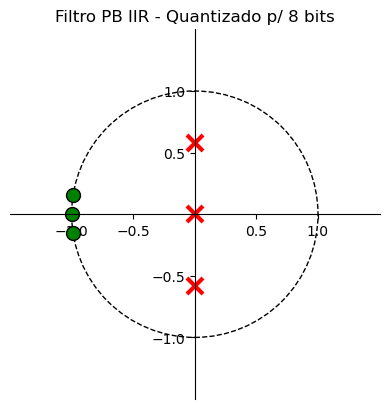

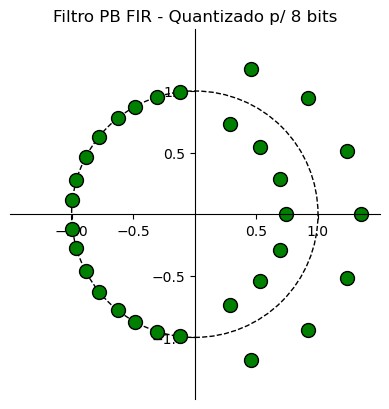

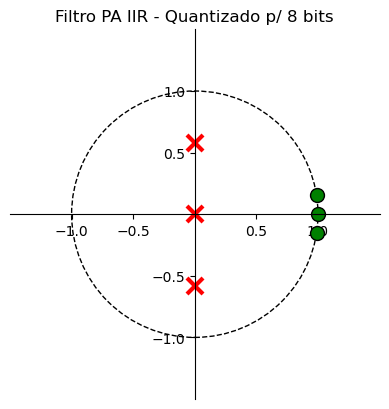

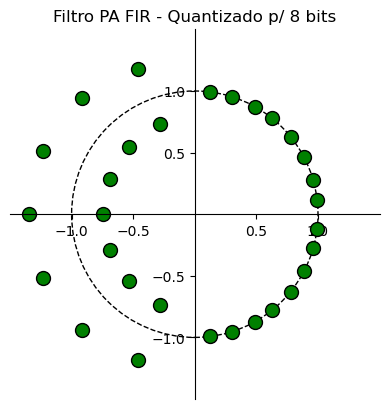

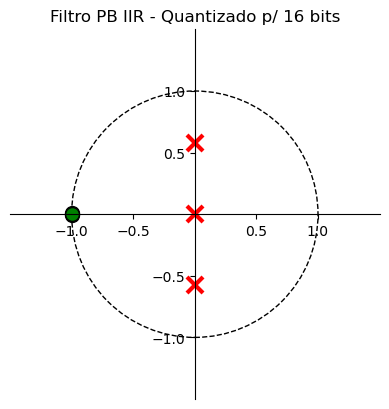

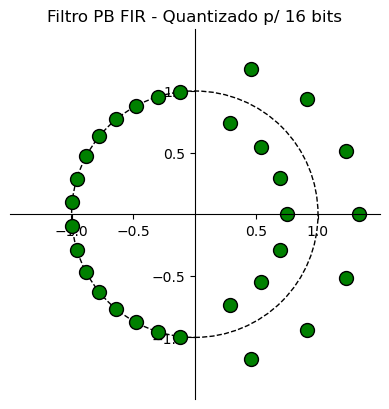

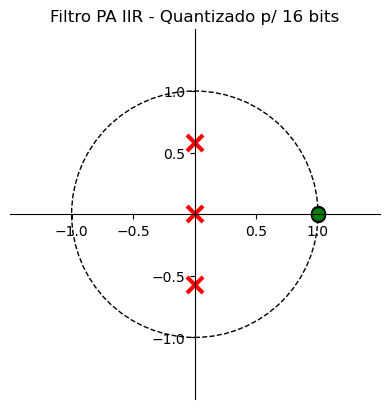

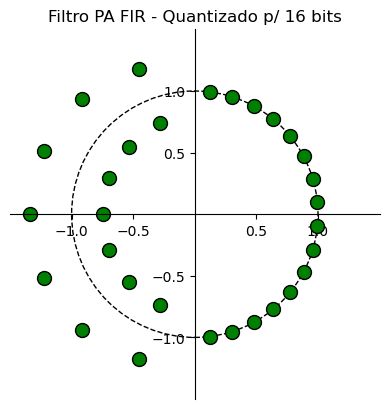

(array([-0.45331522+1.1764584j , -0.45331522-1.1764584j ,
         0.99522311+0.09762666j,  0.99522311-0.09762666j,
         0.95729836+0.28910181j,  0.95729836-0.28910181j,
         0.88290373+0.46955405j,  0.88290373-0.46955405j,
         0.77494433+0.6320295j ,  0.77494433-0.6320295j ,
         0.6379117 +0.77010951j,  0.6379117 -0.77010951j,
         0.47732365+0.87872756j,  0.47732365-0.87872756j,
         0.30075046+0.95370287j,  0.30075046-0.95370287j,
         0.11997528+0.99277688j,  0.11997528-0.99277688j,
        -0.91317593+0.93671102j, -0.91317593-0.93671102j,
        -1.22560415+0.51584986j, -1.22560415-0.51584986j,
        -1.33625111+0.j        , -0.28518479+0.74012085j,
        -0.28518479-0.74012085j, -0.53360979+0.5473624j ,
        -0.53360979-0.5473624j , -0.74836234+0.j        ,
        -0.69313402+0.29173619j, -0.69313402-0.29173619j]),
 array([], dtype=float64),
 1.0)

In [16]:
# Polos e Zeros Quantizados
DSP.zplane(Q8b_PBI, Q8a_PBI, title = "Filtro PB IIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PBF, Q8a_PBF, title = "Filtro PB FIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PAI, Q8a_PAI, title = "Filtro PA IIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PAF, Q8a_PAF, title = "Filtro PA FIR - Quantizado p/ 8 bits")
##
DSP.zplane(Q16b_PBI, Q16a_PBI, title = "Filtro PB IIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PBF, Q16a_PBF, title = "Filtro PB FIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PAI, Q16a_PAI, title = "Filtro PA IIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PAF, Q16a_PAF, title = "Filtro PA FIR - Quantizado p/ 16 bits")

## Observações Sobre a Quantização de Coeficientes

Podemos observar que os filtros FIR não sofreram grandes alterações, seja em 8 ou seja em 16 bits, já os filtros IIR sofreram grandes alterações na localização de zeros. Enquanto os 3 zeros do sistema 64 bits se encontravam no mesmo ponto do plano z ((0, 1) e (0, -1)), ao serem quantizados para 8 bits, os zeros se separam, resultando em dois zeros conjugados

Fora isso, não há nada notável quanto as diferenças, o filtro butterworth costuma ser bem estável e ele não foi instabilizado pela quantização dos coeficientes e seus polos não sofreram grandes alterações.